In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.pandas.set_option('display.max_column', None)

In [2]:
df = pd.read_csv("K:\\data analisis\\olxrumah2edited.csv")

In [3]:
df.head()

,ID,title,bedroom,bathroom,landsqr,buildingsqr,cert,loc,location,floor,postTime,numOfFac,fac,desc,price,url
0,ID IKLAN 812277657,DIJUAL CEPAT RUMAH SIAP HUNI,2,1,72,38,SHM - Sertifikat Hak Milik,"Mekarsari Eco Living, cilame","Andir, Bandung Kota, Jawa Barat",NaN,Hari ini,1.0,Garasi|,spesifikasi :-jalan masuk 2 mobil-di depan rum...,Rp 445.000.000,/item/dijual-cepat-rumah-siap-huni-iid-8122776...
1,ID IKLAN 812154126,HUNIAN MUSLIM CIBIRU KOTA BANDUNG LOKASI STRAT...,2,2,66,45,SHM - Sertifikat Hak Milik,Jl. Gg Damri Cibiru Kota Bandung,"Kiaracondong, Bandung Kota, Jawa Barat",NaN,Kemarin,5.0,Carport| Garden| Garasi| Telephone| PAM|,"""PROMO LAUNCHING""""GRAHA LUQMAN CIBIRU""Hunian m...",Rp 484.500.000,/item/hunian-muslim-cibiru-kota-bandung-lokasi...
2,ID IKLAN 800004986,JUAL Rumah OPER Kredit dp 118 JT Nego di Ciwas...,2,1,60,30,SHM - Sertifikat Hak Milik,"Ciwastra, Bandung","Kiaracondong, Bandung Kota, Jawa Barat",NaN,2 hari yang lalu,2.0,Carport| Garden|,RUMAH OPER KREDIT SOLUSI CEPAT PUNYA RUMAH TAN...,Rp 500.000.000,/item/jual-rumah-oper-kredit-dp-118-jt-nego-di...
3,ID IKLAN 799017727,"RUMAH KPR NO BUNGA,NO DENDA, NO SITA MURAH DI ...",2,2,66,50,SHM - Sertifikat Hak Milik,"Pasir honje,bojong koneng,cimenyan,dago","Antapani (Cicadas), Bandung Kota, Jawa Barat",NaN,3 hari yang lalu,NaN,NaN,*TYPE 1*BismillahHunian Islami Cimuncang Keama...,Rp 497.500.000,/item/rumah-kpr-no-bungano-denda-no-sita-murah...
4,ID IKLAN 811758755,"Cluster mewah murah Bandung kota , promo 2 uni...",3,2,60,60,SHM - Sertifikat Hak Milik,Bandung panyileukan Cibiru cinambo,"Antapani (Cicadas), Bandung Kota, Jawa Barat",NaN,4 hari yang lalu,4.0,Carport| Garasi| Garden| PAM|,Bismillah Alhamdulillah jual Cluster mewah mur...,Rp 465.000.600,/item/cluster-mewah-murah-bandung-kota-promo-2...


# Preprocessing Data

beberapa praproses dan cleaning data dilakukan di ms. excel secara manual, dengan bantuan analisis secara langsung terhadap iklan tersebut.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7989 entries, 0 to 7988
Data columns (total 16 columns):
ID             7989 non-null object
title          7989 non-null object
bedroom        7989 non-null object
bathroom       7989 non-null object
landsqr        7989 non-null int64
buildingsqr    7989 non-null int64
cert           7854 non-null object
loc            7796 non-null object
location       7989 non-null object
floor          7710 non-null float64
postTime       7989 non-null object
numOfFac       7403 non-null float64
fac            7403 non-null object
desc           7989 non-null object
price          7989 non-null object
url            7989 non-null object
dtypes: float64(2), int64(2), object(12)
memory usage: 998.8+ KB


In [5]:
df['ID'] = df['ID'].str.replace('ID IKLAN ', '')

In [6]:
df['price'] = df['price'].str.replace('Rp ', '')
df['price'] = df['price'].str.replace('.', '')

In [7]:
df.head()

,ID,title,bedroom,bathroom,landsqr,buildingsqr,cert,loc,location,floor,postTime,numOfFac,fac,desc,price,url
0,812277657,DIJUAL CEPAT RUMAH SIAP HUNI,2,1,72,38,SHM - Sertifikat Hak Milik,"Mekarsari Eco Living, cilame","Andir, Bandung Kota, Jawa Barat",NaN,Hari ini,1.0,Garasi|,spesifikasi :-jalan masuk 2 mobil-di depan rum...,445000000,/item/dijual-cepat-rumah-siap-huni-iid-8122776...
1,812154126,HUNIAN MUSLIM CIBIRU KOTA BANDUNG LOKASI STRAT...,2,2,66,45,SHM - Sertifikat Hak Milik,Jl. Gg Damri Cibiru Kota Bandung,"Kiaracondong, Bandung Kota, Jawa Barat",NaN,Kemarin,5.0,Carport| Garden| Garasi| Telephone| PAM|,"""PROMO LAUNCHING""""GRAHA LUQMAN CIBIRU""Hunian m...",484500000,/item/hunian-muslim-cibiru-kota-bandung-lokasi...
2,800004986,JUAL Rumah OPER Kredit dp 118 JT Nego di Ciwas...,2,1,60,30,SHM - Sertifikat Hak Milik,"Ciwastra, Bandung","Kiaracondong, Bandung Kota, Jawa Barat",NaN,2 hari yang lalu,2.0,Carport| Garden|,RUMAH OPER KREDIT SOLUSI CEPAT PUNYA RUMAH TAN...,500000000,/item/jual-rumah-oper-kredit-dp-118-jt-nego-di...
3,799017727,"RUMAH KPR NO BUNGA,NO DENDA, NO SITA MURAH DI ...",2,2,66,50,SHM - Sertifikat Hak Milik,"Pasir honje,bojong koneng,cimenyan,dago","Antapani (Cicadas), Bandung Kota, Jawa Barat",NaN,3 hari yang lalu,NaN,NaN,*TYPE 1*BismillahHunian Islami Cimuncang Keama...,497500000,/item/rumah-kpr-no-bungano-denda-no-sita-murah...
4,811758755,"Cluster mewah murah Bandung kota , promo 2 uni...",3,2,60,60,SHM - Sertifikat Hak Milik,Bandung panyileukan Cibiru cinambo,"Antapani (Cicadas), Bandung Kota, Jawa Barat",NaN,4 hari yang lalu,4.0,Carport| Garasi| Garden| PAM|,Bismillah Alhamdulillah jual Cluster mewah mur...,465000600,/item/cluster-mewah-murah-bandung-kota-promo-2...


In [8]:
df.loc[df['bedroom'] == ">10"]


,ID,title,bedroom,bathroom,landsqr,buildingsqr,cert,loc,location,floor,postTime,numOfFac,fac,desc,price,url
54,812256262,Dijual Rumah Kost-kostan Sarijadi Bandung Jawa...,>10,>10,252,450,SHM - Sertifikat Hak Milik,"Sarijadi, Bandung, Jawa Barat","Sukajadi, Bandung Kota, Jawa Barat",NaN,Hari ini,1.0,Garasi|,Dijual Rumah Kost-kostan SarijadiLuas Tanah 25...,2000000000,/item/dijual-rumah-kost-kostan-sarijadi-bandun...
74,812279887,JUAL Rumah Cocok Untuk Kosan Lokasi Jalan Mang...,>10,5,550,560,SHM - Sertifikat Hak Milik,Jalan Mangga Dua - Dayeuhkolot,"Bojongloa Kidul, Bandung Kota, Jawa Barat",NaN,Hari ini,2.0,Carport| Garden|,Spesifikasi : ~ Luas Tanah : 550 mtr~ Luas Ban...,5000000000,/item/jual-rumah-cocok-untuk-kosan-lokasi-jala...
76,795882983,Rumah Dijual di Regol Bandung,>10,8,354,212,SHM - Sertifikat Hak Milik,Regol,"Regol, Bandung Kota, Jawa Barat",NaN,Hari ini,3.0,Carport| PAM| Garasi|,Rumah Dijual di Regol BandungIDR 4.200.000.000...,4200000000,/item/rumah-dijual-di-regol-bandung-iid-795882...
97,812279887,JUAL Rumah Cocok Untuk Kosan Lokasi Jalan Mang...,>10,5,550,560,SHM - Sertifikat Hak Milik,Jalan Mangga Dua - Dayeuhkolot,"Bojongloa Kidul, Bandung Kota, Jawa Barat",NaN,Hari ini,2.0,Carport| Garden|,Spesifikasi : ~ Luas Tanah : 550 mtr~ Luas Ban...,5000000000,/item/jual-rumah-cocok-untuk-kosan-lokasi-jala...
98,770560398,kost aktif strategis di cijagra buah batu,>10,>10,550,300,SHM - Sertifikat Hak Milik,cijagra,"Lengkong, Bandung Kota, Jawa Barat",NaN,Hari ini,5.0,Carport| Gordyn| PAM| Stove| Telephone|,bangunan bagusada 14 kt + km dalamsewa 800rb/b...,6300000000,/item/kost-aktif-strategis-di-cijagra-buah-bat...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7932,799614927,DIJUAL KOST KOSTAN AKTIF DI CIJAGRA BUAHBATU B...,>10,>10,550,300,SHM - Sertifikat Hak Milik,"Cijagra, Buahbatu Bandung","Astana Anyar, Bandung Kota, Jawa Barat",1.0,14 Des,3.0,Carport| Garasi| Garden|,Luas Tanah: 550mLuas Bangunan: 300mKamar Tidu...,6300000000,/item/dijual-kost-kostan-aktif-di-cijagra-buah...
7947,791277202,RUMAH SAYAP RIAU MARTADINATA BANDUNG,>10,3,390,265,SHM - Sertifikat Hak Milik,MARTADINATA ( RIAU ) BANDUNG,"Bandung Wetan, Bandung Kota, Jawa Barat",1.0,14 Des,3.0,Carport| Garasi| PAM|,rumah sayap Riau ( martadinanta ) bandung pusa...,13000000000,/item/rumah-sayap-riau-martadinata-bandung-iid...
7950,811383346,Rumah dekat unpad unikom di dipatiukur bandung,>10,4,456,280,SHM - Sertifikat Hak Milik,dipatiukur - dago,"Coblong, Bandung Kota, Jawa Barat",1.0,14 Des,6.0,Carport| Garden| Garasi| Telephone| PAM| Gordyn|,"dekat ke unikom, unpad5 menit ke gedung sate, ...",25000000000,/item/rumah-dekat-unpad-unikom-di-dipatiukur-b...
7951,811382886,Rumah strategis dekat unpad di dipatiukur bandung,>10,4,456,280,SHM - Sertifikat Hak Milik,dipatiukur - dago,"Coblong, Bandung Kota, Jawa Barat",1.0,14 Des,6.0,Carport| Garasi| Telephone| PAM| Gordyn| Garden|,"dekat ke unikom, unpad5 menit ke gedung sate, ...",25000000000,/item/rumah-strategis-dekat-unpad-di-dipatiuku...


In [9]:
df['bedroom'] = df['bedroom'].str.replace('>10', '11')

In [10]:
df['bathroom'] = df['bathroom'].str.replace('>10', '11')

In [11]:
df.loc[df['bedroom'] == ">10"]

,ID,title,bedroom,bathroom,landsqr,buildingsqr,cert,loc,location,floor,postTime,numOfFac,fac,desc,price,url


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7989 entries, 0 to 7988
Data columns (total 16 columns):
ID             7989 non-null object
title          7989 non-null object
bedroom        7989 non-null object
bathroom       7989 non-null object
landsqr        7989 non-null int64
buildingsqr    7989 non-null int64
cert           7854 non-null object
loc            7796 non-null object
location       7989 non-null object
floor          7710 non-null float64
postTime       7989 non-null object
numOfFac       7403 non-null float64
fac            7403 non-null object
desc           7989 non-null object
price          7989 non-null object
url            7989 non-null object
dtypes: float64(2), int64(2), object(12)
memory usage: 998.8+ KB


In [13]:
df = df.astype({"bedroom": int, "bathroom": int, 'price':float})

In [14]:
df.numOfFac.isnull().values.sum()


586

In [15]:
df.floor.isnull().values.sum()

279

In [16]:
df.cert.isnull().values.sum()

135

In [17]:
df.loc[df['numOfFac'] == 14]


,ID,title,bedroom,bathroom,landsqr,buildingsqr,cert,loc,location,floor,postTime,numOfFac,fac,desc,price,url
344,793545796,Rumah Mewah Design Villa + Pool Di Komplek Tar...,4,3,90,130,SHM - Sertifikat Hak Milik,"Jl. Taruna VI, Komplek Taruna Parahyangan, Kot...","Sumur Bandung, Bandung Kota, Jawa Barat",3.0,Hari ini,14.0,AC| Carport| Fire Extenguisher| Garasi| Garde...,Konsep hunian yang memaksimalkan lahan dengan ...,1.499000e+09,/item/rumah-mewah-design-villa-pool-di-komplek...
363,776939130,Rumah Syariah Di Kawasan Dago Kota Bandung Bis...,3,4,135,180,SHM - Sertifikat Hak Milik,"Cigadung, Kec. Cibeunying Kaler, Kota Bandung,...","Coblong, Bandung Kota, Jawa Barat",3.0,Hari ini,14.0,AC| Carport| Fire Extenguisher| Garasi| Garde...,Kavling T1 Type Bangunan UpslopeKenapa Memilih...,2.992500e+09,/item/rumah-syariah-di-kawasan-dago-kota-bandu...
392,773762903,Cluster Mewah Unit Indent Di Kawasan Elite Kot...,4,3,148,196,SHM - Sertifikat Hak Milik,"Patio Verde 2 Cigadung, Kec. Cibeunying Kaler,...","Cibeunying Kaler, Bandung Kota, Jawa Barat",3.0,Hari ini,14.0,AC| Carport| Fire Extenguisher| Garasi| Garde...,Kavling U1 Type Bangunan UpslopeCluster Mewah ...,3.263250e+09,/item/cluster-mewah-unit-indent-di-kawasan-eli...
456,811904336,Rumah Dago Resort Pakar Mawar Include Furnished,7,5,595,469,SHM - Sertifikat Hak Milik,DAGO RESORT PAKAR MAWAR,"Antapani (Cicadas), Bandung Kota, Jawa Barat",3.0,2 hari yang lalu,14.0,AC| Carport| Fire Extenguisher| Garasi| Garde...,Dijual Rumah Dago Resort Pakar Mawar include f...,1.250000e+10,/item/rumah-dago-resort-pakar-mawar-include-fu...
530,793545796,Rumah Mewah Design Villa + Pool Di Komplek Tar...,4,3,90,130,SHM - Sertifikat Hak Milik,"Jl. Taruna VI, Komplek Taruna Parahyangan, Kot...","Sumur Bandung, Bandung Kota, Jawa Barat",3.0,Hari ini,14.0,AC| Carport| Fire Extenguisher| Garasi| Garde...,Konsep hunian yang memaksimalkan lahan dengan ...,1.499000e+09,/item/rumah-mewah-design-villa-pool-di-komplek...
549,776939130,Rumah Syariah Di Kawasan Dago Kota Bandung Bis...,3,4,135,180,SHM - Sertifikat Hak Milik,"Cigadung, Kec. Cibeunying Kaler, Kota Bandung,...","Coblong, Bandung Kota, Jawa Barat",3.0,Hari ini,14.0,AC| Carport| Fire Extenguisher| Garasi| Garde...,Kavling T1 Type Bangunan UpslopeKenapa Memilih...,2.992500e+09,/item/rumah-syariah-di-kawasan-dago-kota-bandu...
581,773762903,Cluster Mewah Unit Indent Di Kawasan Elite Kot...,4,3,148,196,SHM - Sertifikat Hak Milik,"Patio Verde 2 Cigadung, Kec. Cibeunying Kaler,...","Cibeunying Kaler, Bandung Kota, Jawa Barat",3.0,Hari ini,14.0,AC| Carport| Fire Extenguisher| Garasi| Garde...,Kavling U1 Type Bangunan UpslopeCluster Mewah ...,3.263250e+09,/item/cluster-mewah-unit-indent-di-kawasan-eli...
645,811904336,Rumah Dago Resort Pakar Mawar Include Furnished,7,5,595,469,SHM - Sertifikat Hak Milik,DAGO RESORT PAKAR MAWAR,"Antapani (Cicadas), Bandung Kota, Jawa Barat",3.0,2 hari yang lalu,14.0,AC| Carport| Fire Extenguisher| Garasi| Garde...,Dijual Rumah Dago Resort Pakar Mawar include f...,1.250000e+10,/item/rumah-dago-resort-pakar-mawar-include-fu...
889,760270151,Villa Free Design Lembang Asri Dekat Wisata Le...,2,3,93,55,SHM - Sertifikat Hak Milik,"Jl. Mesjid Nagrak, Sukajaya, Lembang, Kabupate...","Sukajadi, Bandung Kota, Jawa Barat",2.0,Hari ini,14.0,AC| Carport| Fire Extenguisher| Garasi| Garde...,BELI VILLA BISA CUSTOM DESAIN SENDIRI !!semua ...,6.650000e+08,/item/villa-free-design-lembang-asri-dekat-wis...
1182,768008101,Rumah Terjangkau Berkualitas City View Kawasan...,3,2,76,70,SHM - Sertifikat Hak Milik,Jalan Kamarung Kota Cimahi,"Sukajadi, Bandung Kota, Jawa Barat",2.0,Hari ini,14.0,AC| Carport| Fire Extenguisher| Garasi| Garde...,PESONA PAVILIUN KOTA CIMAHIRumah 2 Lantai Excl...,7.950000e+08,/item/rumah-terjangkau-berkualitas-city-view-k...


In [18]:
df.max()

ID                                                     812289757
title          yu segera booking hunian indah strategis harga...
bedroom                                                       11
bathroom                                                      11
landsqr                                                  2222255
buildingsqr                                              2222250
location                  Ujung Berung, Bandung Kota, Jawa Barat
floor                                                          4
postTime                                                 Kemarin
numOfFac                                                      14
desc           ろやぇ たかやま - Royale Takayama\r Hunian Gaya Jepan...
price                                                    7.5e+10
url            /item/zn-rumah-untuk-usaha-dengan-lokasi-strat...
dtype: object

In [19]:
df.loc[df['bedroom'] > 10]

,ID,title,bedroom,bathroom,landsqr,buildingsqr,cert,loc,location,floor,postTime,numOfFac,fac,desc,price,url
54,812256262,Dijual Rumah Kost-kostan Sarijadi Bandung Jawa...,11,11,252,450,SHM - Sertifikat Hak Milik,"Sarijadi, Bandung, Jawa Barat","Sukajadi, Bandung Kota, Jawa Barat",NaN,Hari ini,1.0,Garasi|,Dijual Rumah Kost-kostan SarijadiLuas Tanah 25...,2.000000e+09,/item/dijual-rumah-kost-kostan-sarijadi-bandun...
74,812279887,JUAL Rumah Cocok Untuk Kosan Lokasi Jalan Mang...,11,5,550,560,SHM - Sertifikat Hak Milik,Jalan Mangga Dua - Dayeuhkolot,"Bojongloa Kidul, Bandung Kota, Jawa Barat",NaN,Hari ini,2.0,Carport| Garden|,Spesifikasi : ~ Luas Tanah : 550 mtr~ Luas Ban...,5.000000e+09,/item/jual-rumah-cocok-untuk-kosan-lokasi-jala...
76,795882983,Rumah Dijual di Regol Bandung,11,8,354,212,SHM - Sertifikat Hak Milik,Regol,"Regol, Bandung Kota, Jawa Barat",NaN,Hari ini,3.0,Carport| PAM| Garasi|,Rumah Dijual di Regol BandungIDR 4.200.000.000...,4.200000e+09,/item/rumah-dijual-di-regol-bandung-iid-795882...
97,812279887,JUAL Rumah Cocok Untuk Kosan Lokasi Jalan Mang...,11,5,550,560,SHM - Sertifikat Hak Milik,Jalan Mangga Dua - Dayeuhkolot,"Bojongloa Kidul, Bandung Kota, Jawa Barat",NaN,Hari ini,2.0,Carport| Garden|,Spesifikasi : ~ Luas Tanah : 550 mtr~ Luas Ban...,5.000000e+09,/item/jual-rumah-cocok-untuk-kosan-lokasi-jala...
98,770560398,kost aktif strategis di cijagra buah batu,11,11,550,300,SHM - Sertifikat Hak Milik,cijagra,"Lengkong, Bandung Kota, Jawa Barat",NaN,Hari ini,5.0,Carport| Gordyn| PAM| Stove| Telephone|,bangunan bagusada 14 kt + km dalamsewa 800rb/b...,6.300000e+09,/item/kost-aktif-strategis-di-cijagra-buah-bat...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7932,799614927,DIJUAL KOST KOSTAN AKTIF DI CIJAGRA BUAHBATU B...,11,11,550,300,SHM - Sertifikat Hak Milik,"Cijagra, Buahbatu Bandung","Astana Anyar, Bandung Kota, Jawa Barat",1.0,14 Des,3.0,Carport| Garasi| Garden|,Luas Tanah: 550mLuas Bangunan: 300mKamar Tidu...,6.300000e+09,/item/dijual-kost-kostan-aktif-di-cijagra-buah...
7947,791277202,RUMAH SAYAP RIAU MARTADINATA BANDUNG,11,3,390,265,SHM - Sertifikat Hak Milik,MARTADINATA ( RIAU ) BANDUNG,"Bandung Wetan, Bandung Kota, Jawa Barat",1.0,14 Des,3.0,Carport| Garasi| PAM|,rumah sayap Riau ( martadinanta ) bandung pusa...,1.300000e+10,/item/rumah-sayap-riau-martadinata-bandung-iid...
7950,811383346,Rumah dekat unpad unikom di dipatiukur bandung,11,4,456,280,SHM - Sertifikat Hak Milik,dipatiukur - dago,"Coblong, Bandung Kota, Jawa Barat",1.0,14 Des,6.0,Carport| Garden| Garasi| Telephone| PAM| Gordyn|,"dekat ke unikom, unpad5 menit ke gedung sate, ...",2.500000e+10,/item/rumah-dekat-unpad-unikom-di-dipatiukur-b...
7951,811382886,Rumah strategis dekat unpad di dipatiukur bandung,11,4,456,280,SHM - Sertifikat Hak Milik,dipatiukur - dago,"Coblong, Bandung Kota, Jawa Barat",1.0,14 Des,6.0,Carport| Garasi| Telephone| PAM| Gordyn| Garden|,"dekat ke unikom, unpad5 menit ke gedung sate, ...",2.500000e+10,/item/rumah-strategis-dekat-unpad-di-dipatiuku...


In [20]:
df.loc[df['bathroom'] > 10]

,ID,title,bedroom,bathroom,landsqr,buildingsqr,cert,loc,location,floor,postTime,numOfFac,fac,desc,price,url
54,812256262,Dijual Rumah Kost-kostan Sarijadi Bandung Jawa...,11,11,252,450,SHM - Sertifikat Hak Milik,"Sarijadi, Bandung, Jawa Barat","Sukajadi, Bandung Kota, Jawa Barat",NaN,Hari ini,1.0,Garasi|,Dijual Rumah Kost-kostan SarijadiLuas Tanah 25...,2.000000e+09,/item/dijual-rumah-kost-kostan-sarijadi-bandun...
98,770560398,kost aktif strategis di cijagra buah batu,11,11,550,300,SHM - Sertifikat Hak Milik,cijagra,"Lengkong, Bandung Kota, Jawa Barat",NaN,Hari ini,5.0,Carport| Gordyn| PAM| Stove| Telephone|,bangunan bagusada 14 kt + km dalamsewa 800rb/b...,6.300000e+09,/item/kost-aktif-strategis-di-cijagra-buah-bat...
201,812256262,Dijual Rumah Kost-kostan Sarijadi Bandung Jawa...,11,11,252,450,SHM - Sertifikat Hak Milik,"Sarijadi, Bandung, Jawa Barat","Sukajadi, Bandung Kota, Jawa Barat",NaN,Hari ini,1.0,Garasi|,Dijual Rumah Kost-kostan SarijadiLuas Tanah 25...,2.000000e+09,/item/dijual-rumah-kost-kostan-sarijadi-bandun...
244,770560398,kost aktif strategis di cijagra buah batu,11,11,550,300,SHM - Sertifikat Hak Milik,cijagra,"Lengkong, Bandung Kota, Jawa Barat",NaN,Hari ini,5.0,Carport| Gordyn| PAM| Stove| Telephone|,bangunan bagusada 14 kt + km dalamsewa 800rb/b...,6.300000e+09,/item/kost-aktif-strategis-di-cijagra-buah-bat...
297,810570793,Best Deal!!! 2 Rumah Dalam 1 Gerbang di Citra ...,11,11,1097,1300,SHM - Sertifikat Hak Milik,"Komplek Citra Green Dago, Kel. Ciumbuleit, Kec...","Coblong, Bandung Kota, Jawa Barat",4.0,Hari ini,3.0,Carport| Garasi| Garden|,TURUN HARGA15 MILYAR menjadi 11 MILYARLuas tan...,1.100000e+10,/item/best-deal-2-rumah-dalam-1-gerbang-di-cit...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5966,799614927,DIJUAL KOST KOSTAN AKTIF DI CIJAGRA BUAHBATU B...,11,11,550,300,SHM - Sertifikat Hak Milik,"Cijagra, Buahbatu Bandung","Astana Anyar, Bandung Kota, Jawa Barat",1.0,14 Des,3.0,Carport| Garasi| Garden|,Luas Tanah: 550mLuas Bangunan: 300mKamar Tidu...,6.300000e+09,/item/dijual-kost-kostan-aktif-di-cijagra-buah...
5996,526601797,262 Rumah Kost Aktif Sayap Tubagus Ismail - Ba...,11,11,350,321,SHM - Sertifikat Hak Milik,dago,"Coblong, Bandung Kota, Jawa Barat",1.0,14 Des,2.0,Carport| Garden|,100 meter ke Mainroad Tubagus Ismail\rAkses ja...,5.500000e+09,/item/262-rumah-kost-aktif-sayap-tubagus-ismai...
7831,760543442,Rumah strategis untuk hotel dan cafe di mainro...,11,11,2053,800,SHM - Sertifikat Hak Milik,riau,"Bandung Wetan, Bandung Kota, Jawa Barat",1.0,Hari ini,6.0,Carport| Garasi| Garden| PAM| Swimming Pool| ...,jalan lebar 2 arahterlewati jalur angkotbangun...,7.500000e+10,/item/rumah-strategis-untuk-hotel-dan-cafe-di-...
7932,799614927,DIJUAL KOST KOSTAN AKTIF DI CIJAGRA BUAHBATU B...,11,11,550,300,SHM - Sertifikat Hak Milik,"Cijagra, Buahbatu Bandung","Astana Anyar, Bandung Kota, Jawa Barat",1.0,14 Des,3.0,Carport| Garasi| Garden|,Luas Tanah: 550mLuas Bangunan: 300mKamar Tidu...,6.300000e+09,/item/dijual-kost-kostan-aktif-di-cijagra-buah...


In [21]:
df.loc[df['landsqr'] > 5000]

,ID,title,bedroom,bathroom,landsqr,buildingsqr,cert,loc,location,floor,postTime,numOfFac,fac,desc,price,url
132,780381295,Dcari rumah over kredit yg murah,2,2,10000,45,NaN,Garut bandung cililin,"Coblong, Bandung Kota, Jawa Barat",NaN,4 hari yang lalu,NaN,NaN,Sy bayariiiiiinn cashhhh,1.000000e+08,/item/dcari-rumah-over-kredit-yg-murah-iid-780...
717,812168124,Rumah halal dan Modern hanya di Cluster ALSAGRIYA,4,2,2222255,2222250,SHM - Sertifikat Hak Milik,"Jl. Simpati, Cilame, Kec. Ngamprah, Hunian di ...","Bojongloa Kaler, Bandung Kota, Jawa Barat",2.0,Kemarin,NaN,NaN,Assalamualaikum Warohmatullahi Wabarokatuh..Be...,4.585420e+08,/item/rumah-halal-dan-modern-hanya-di-cluster-...
718,812167864,"Rumah sistem Syariah, Lokasi Strategis dan hal...",3,2,222255,222250,SHM - Sertifikat Hak Milik,"Jl. Simpati, Cilame, Kec. Ngamprah, Kabupaten ...","Batununggal, Bandung Kota, Jawa Barat",2.0,Kemarin,NaN,NaN,Dijual perumahan CLUSTER ALSAGRIYA dengan kons...,4.582430e+08,/item/rumah-sistem-syariah-lokasi-strategis-da...
719,812167574,"Cluster ALSAGRIYA, Rumah modern dgn sistem hal...",3,2,22255,22250,SHM - Sertifikat Hak Milik,"Jalan.Simpati, Cilame, Kec. Ngamprah, Kabupate...","Bandung Wetan, Bandung Kota, Jawa Barat",2.0,Kemarin,NaN,NaN,Bismillahirrahmanirrahim ..Alhamdulillah Telah...,4.582345e+08,/item/cluster-alsagriya-rumah-modern-dgn-siste...
2385,811237108,Dijual Villa Halaman Luas di Baleendah Bandung...,4,3,7000,250,SHM - Sertifikat Hak Milik,"Baleendah, Bandung Selatan","Astana Anyar, Bandung Kota, Jawa Barat",2.0,12 Des,2.0,Carport| Garden|,SELAYANG PANDANG BANDUNG SELATANPemerintah mem...,4.500000e+09,/item/dijual-villa-halaman-luas-di-baleendah-b...
2704,811728494,Rumah hitz Bandung,2,2,5060,46,SHM - Sertifikat Hak Milik,"Buahbatu ,cikoneng RezkyFauzi(089686856319)","Buahbatu (Margacinta), Bandung Kota, Jawa Barat",2.0,5 hari yang lalu,2.0,Carport| Garasi|,"Rumah dengan harga terjangkau di kota madya, D...",2.170000e+08,/item/rumah-hitz-bandung-iid-811728494\n
2822,812168124,Rumah halal dan Modern hanya di Cluster ALSAGRIYA,4,2,2222255,2222250,SHM - Sertifikat Hak Milik,"Jl. Simpati, Cilame, Kec. Ngamprah, Hunian di ...","Bojongloa Kaler, Bandung Kota, Jawa Barat",2.0,Kemarin,NaN,NaN,Assalamualaikum Warohmatullahi Wabarokatuh..Be...,4.585420e+08,/item/rumah-halal-dan-modern-hanya-di-cluster-...
2823,812167864,"Rumah sistem Syariah, Lokasi Strategis dan hal...",3,2,222255,222250,SHM - Sertifikat Hak Milik,"Jl. Simpati, Cilame, Kec. Ngamprah, Kabupaten ...","Batununggal, Bandung Kota, Jawa Barat",2.0,Kemarin,NaN,NaN,Dijual perumahan CLUSTER ALSAGRIYA dengan kons...,4.582430e+08,/item/rumah-sistem-syariah-lokasi-strategis-da...
2824,812167574,"Cluster ALSAGRIYA, Rumah modern dgn sistem hal...",3,2,22255,22250,SHM - Sertifikat Hak Milik,"Jalan.Simpati, Cilame, Kec. Ngamprah, Kabupate...","Bandung Wetan, Bandung Kota, Jawa Barat",2.0,Kemarin,NaN,NaN,Bismillahirrahmanirrahim ..Alhamdulillah Telah...,4.582345e+08,/item/cluster-alsagriya-rumah-modern-dgn-siste...
4492,811237108,Dijual Villa Halaman Luas di Baleendah Bandung...,4,3,7000,250,SHM - Sertifikat Hak Milik,"Baleendah, Bandung Selatan","Astana Anyar, Bandung Kota, Jawa Barat",2.0,12 Des,2.0,Carport| Garden|,SELAYANG PANDANG BANDUNG SELATANPemerintah mem...,4.500000e+09,/item/dijual-villa-halaman-luas-di-baleendah-b...


In [22]:
df.loc[df['buildingsqr'] > 5000]

,ID,title,bedroom,bathroom,landsqr,buildingsqr,cert,loc,location,floor,postTime,numOfFac,fac,desc,price,url
388,812275547,SIAPA CEPAT DIA DAPAT! HAYU BURUAN CEK HUNIAN ...,7,4,475,317665,SHM - Sertifikat Hak Milik,"Jl. Yupiter Raya, Sekejati, Kota Bandung, Jawa...","Buahbatu (Margacinta), Bandung Kota, Jawa Barat",3.0,Hari ini,2.0,Carport| Garasi|,Mendapatkan suasana kota yang ramai dan lokasi...,3.500000e+09,/item/siapa-cepat-dia-dapat-hayu-buruan-cek-hu...
577,812275547,SIAPA CEPAT DIA DAPAT! HAYU BURUAN CEK HUNIAN ...,7,4,475,317665,SHM - Sertifikat Hak Milik,"Jl. Yupiter Raya, Sekejati, Kota Bandung, Jawa...","Buahbatu (Margacinta), Bandung Kota, Jawa Barat",3.0,Hari ini,2.0,Carport| Garasi|,Mendapatkan suasana kota yang ramai dan lokasi...,3.500000e+09,/item/siapa-cepat-dia-dapat-hayu-buruan-cek-hu...
717,812168124,Rumah halal dan Modern hanya di Cluster ALSAGRIYA,4,2,2222255,2222250,SHM - Sertifikat Hak Milik,"Jl. Simpati, Cilame, Kec. Ngamprah, Hunian di ...","Bojongloa Kaler, Bandung Kota, Jawa Barat",2.0,Kemarin,NaN,NaN,Assalamualaikum Warohmatullahi Wabarokatuh..Be...,4.585420e+08,/item/rumah-halal-dan-modern-hanya-di-cluster-...
718,812167864,"Rumah sistem Syariah, Lokasi Strategis dan hal...",3,2,222255,222250,SHM - Sertifikat Hak Milik,"Jl. Simpati, Cilame, Kec. Ngamprah, Kabupaten ...","Batununggal, Bandung Kota, Jawa Barat",2.0,Kemarin,NaN,NaN,Dijual perumahan CLUSTER ALSAGRIYA dengan kons...,4.582430e+08,/item/rumah-sistem-syariah-lokasi-strategis-da...
719,812167574,"Cluster ALSAGRIYA, Rumah modern dgn sistem hal...",3,2,22255,22250,SHM - Sertifikat Hak Milik,"Jalan.Simpati, Cilame, Kec. Ngamprah, Kabupate...","Bandung Wetan, Bandung Kota, Jawa Barat",2.0,Kemarin,NaN,NaN,Bismillahirrahmanirrahim ..Alhamdulillah Telah...,4.582345e+08,/item/cluster-alsagriya-rumah-modern-dgn-siste...
2822,812168124,Rumah halal dan Modern hanya di Cluster ALSAGRIYA,4,2,2222255,2222250,SHM - Sertifikat Hak Milik,"Jl. Simpati, Cilame, Kec. Ngamprah, Hunian di ...","Bojongloa Kaler, Bandung Kota, Jawa Barat",2.0,Kemarin,NaN,NaN,Assalamualaikum Warohmatullahi Wabarokatuh..Be...,4.585420e+08,/item/rumah-halal-dan-modern-hanya-di-cluster-...
2823,812167864,"Rumah sistem Syariah, Lokasi Strategis dan hal...",3,2,222255,222250,SHM - Sertifikat Hak Milik,"Jl. Simpati, Cilame, Kec. Ngamprah, Kabupaten ...","Batununggal, Bandung Kota, Jawa Barat",2.0,Kemarin,NaN,NaN,Dijual perumahan CLUSTER ALSAGRIYA dengan kons...,4.582430e+08,/item/rumah-sistem-syariah-lokasi-strategis-da...
2824,812167574,"Cluster ALSAGRIYA, Rumah modern dgn sistem hal...",3,2,22255,22250,SHM - Sertifikat Hak Milik,"Jalan.Simpati, Cilame, Kec. Ngamprah, Kabupate...","Bandung Wetan, Bandung Kota, Jawa Barat",2.0,Kemarin,NaN,NaN,Bismillahirrahmanirrahim ..Alhamdulillah Telah...,4.582345e+08,/item/cluster-alsagriya-rumah-modern-dgn-siste...
6454,812166022,Rumah halal Cluster Alsagriya di ABndung barat...,2,1,222255,222230,SHM - Sertifikat Hak Milik,"Cilame, Kec. Ngamprah, Kabupaten Bandung, Nome...","Astana Anyar, Bandung Kota, Jawa Barat",1.0,Kemarin,NaN,NaN,Perumahan Syariah CLUSTER ALSAGRIYA- Tanpa Ban...,3.082350e+08,/item/rumah-halal-cluster-alsagriya-di-abndung...


In [23]:
df.drop(df.loc[df['buildingsqr'] > 5000].index)



,ID,title,bedroom,bathroom,landsqr,buildingsqr,cert,loc,location,floor,postTime,numOfFac,fac,desc,price,url
0,812277657,DIJUAL CEPAT RUMAH SIAP HUNI,2,1,72,38,SHM - Sertifikat Hak Milik,"Mekarsari Eco Living, cilame","Andir, Bandung Kota, Jawa Barat",NaN,Hari ini,1.0,Garasi|,spesifikasi :-jalan masuk 2 mobil-di depan rum...,4.450000e+08,/item/dijual-cepat-rumah-siap-huni-iid-8122776...
1,812154126,HUNIAN MUSLIM CIBIRU KOTA BANDUNG LOKASI STRAT...,2,2,66,45,SHM - Sertifikat Hak Milik,Jl. Gg Damri Cibiru Kota Bandung,"Kiaracondong, Bandung Kota, Jawa Barat",NaN,Kemarin,5.0,Carport| Garden| Garasi| Telephone| PAM|,"""PROMO LAUNCHING""""GRAHA LUQMAN CIBIRU""Hunian m...",4.845000e+08,/item/hunian-muslim-cibiru-kota-bandung-lokasi...
2,800004986,JUAL Rumah OPER Kredit dp 118 JT Nego di Ciwas...,2,1,60,30,SHM - Sertifikat Hak Milik,"Ciwastra, Bandung","Kiaracondong, Bandung Kota, Jawa Barat",NaN,2 hari yang lalu,2.0,Carport| Garden|,RUMAH OPER KREDIT SOLUSI CEPAT PUNYA RUMAH TAN...,5.000000e+08,/item/jual-rumah-oper-kredit-dp-118-jt-nego-di...
3,799017727,"RUMAH KPR NO BUNGA,NO DENDA, NO SITA MURAH DI ...",2,2,66,50,SHM - Sertifikat Hak Milik,"Pasir honje,bojong koneng,cimenyan,dago","Antapani (Cicadas), Bandung Kota, Jawa Barat",NaN,3 hari yang lalu,NaN,NaN,*TYPE 1*BismillahHunian Islami Cimuncang Keama...,4.975000e+08,/item/rumah-kpr-no-bungano-denda-no-sita-murah...
4,811758755,"Cluster mewah murah Bandung kota , promo 2 uni...",3,2,60,60,SHM - Sertifikat Hak Milik,Bandung panyileukan Cibiru cinambo,"Antapani (Cicadas), Bandung Kota, Jawa Barat",NaN,4 hari yang lalu,4.0,Carport| Garasi| Garden| PAM|,Bismillah Alhamdulillah jual Cluster mewah mur...,4.650006e+08,/item/cluster-mewah-murah-bandung-kota-promo-2...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7984,812259109,Rumah Ciwastra Buah Batu Bandung | 0,9,4,200,150,SHM - Sertifikat Hak Milik,Bandung,"Buahbatu (Margacinta), Bandung Kota, Jawa Barat",2.0,Hari ini,NaN,NaN,Kode Iklan 0Dijual Rumah Ciwastra Buah Batu Ba...,1.200000e+09,/item/rumah-ciwastra-buah-batu-bandung-0-iid-8...
7985,812263994,Rumah Hoek Antapani Bandung | 0,4,4,201,148,SHM - Sertifikat Hak Milik,Bandung,"Antapani (Cicadas), Bandung Kota, Jawa Barat",2.0,Hari ini,NaN,NaN,Kode Iklan 0Dijual Rumah Hoek Antapani Bandung...,2.100000e+09,/item/rumah-hoek-antapani-bandung-0-iid-812263...
7986,761804288,Braga CityWalk Bandung,3,2,81,81,"Lainnya (PPJB, Girik, Adat, dll)",Braga CityWalk Bandung,"Antapani (Cicadas), Bandung Kota, Jawa Barat",2.0,Hari ini,2.0,AC| Garden|,Jual Apartement Braga CityWalk Bandung Tengah.ars,1.750000e+09,/item/braga-citywalk-bandung-iid-761804288\n
7987,811800876,"ASET BAGUS HARGA BBERTEMAN, YUK CEK RUMAH SIAP...",8,4,380,300,SHM - Sertifikat Hak Milik,"Jl. Siliwangi, Lebak Siliwangi, Bandung City, ...","Coblong, Bandung Kota, Jawa Barat",2.0,4 hari yang lalu,NaN,NaN,Mendapatkan suasana kota yang ramai dan lokasi...,4.000000e+09,/item/aset-bagus-harga-bberteman-yuk-cek-rumah...


In [24]:
df = df.drop(df.loc[df['buildingsqr'] > 5000].index)


In [25]:
df = df.drop(df.loc[df['landsqr'] > 5000].index)

In [26]:
df.loc[df['landsqr'] > 5000]

,ID,title,bedroom,bathroom,landsqr,buildingsqr,cert,loc,location,floor,postTime,numOfFac,fac,desc,price,url


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7976 entries, 0 to 7988
Data columns (total 16 columns):
ID             7976 non-null object
title          7976 non-null object
bedroom        7976 non-null int32
bathroom       7976 non-null int32
landsqr        7976 non-null int64
buildingsqr    7976 non-null int64
cert           7842 non-null object
loc            7783 non-null object
location       7976 non-null object
floor          7698 non-null float64
postTime       7976 non-null object
numOfFac       7398 non-null float64
fac            7398 non-null object
desc           7976 non-null object
price          7976 non-null float64
url            7976 non-null object
dtypes: float64(3), int32(2), int64(2), object(9)
memory usage: 997.0+ KB


In [28]:
df.location.unique()

array(['Andir, Bandung Kota, Jawa Barat',
       'Kiaracondong, Bandung Kota, Jawa Barat',
       'Antapani (Cicadas), Bandung Kota, Jawa Barat',
       'Buahbatu (Margacinta), Bandung Kota, Jawa Barat',
       'Purwakarta, Purwakarta Kab., Jawa Barat',
       'Bojongloa Kidul, Bandung Kota, Jawa Barat',
       'Lengkong, Bandung Kota, Jawa Barat',
       'Bandung Kidul, Bandung Kota, Jawa Barat',
       'Parongpong, Bandung Barat Kab., Jawa Barat',
       'Regol, Bandung Kota, Jawa Barat',
       'Arcamanik, Bandung Kota, Jawa Barat',
       'Bojongsoang, Bandung Kab., Jawa Barat',
       'Cangkuang, Bandung Kab., Jawa Barat',
       'Sukajadi, Bandung Kota, Jawa Barat',
       'Cicendo, Bandung Kota, Jawa Barat',
       'Astana Anyar, Bandung Kota, Jawa Barat',
       'Padalarang, Bandung Barat Kab., Jawa Barat',
       'Bojongloa Kaler, Bandung Kota, Jawa Barat',
       'Coblong, Bandung Kota, Jawa Barat',
       'Batununggal, Bandung Kota, Jawa Barat',
       'Cibeunying Kaler, Ban

In [29]:
df.head()

,ID,title,bedroom,bathroom,landsqr,buildingsqr,cert,loc,location,floor,postTime,numOfFac,fac,desc,price,url
0,812277657,DIJUAL CEPAT RUMAH SIAP HUNI,2,1,72,38,SHM - Sertifikat Hak Milik,"Mekarsari Eco Living, cilame","Andir, Bandung Kota, Jawa Barat",NaN,Hari ini,1.0,Garasi|,spesifikasi :-jalan masuk 2 mobil-di depan rum...,445000000.0,/item/dijual-cepat-rumah-siap-huni-iid-8122776...
1,812154126,HUNIAN MUSLIM CIBIRU KOTA BANDUNG LOKASI STRAT...,2,2,66,45,SHM - Sertifikat Hak Milik,Jl. Gg Damri Cibiru Kota Bandung,"Kiaracondong, Bandung Kota, Jawa Barat",NaN,Kemarin,5.0,Carport| Garden| Garasi| Telephone| PAM|,"""PROMO LAUNCHING""""GRAHA LUQMAN CIBIRU""Hunian m...",484500000.0,/item/hunian-muslim-cibiru-kota-bandung-lokasi...
2,800004986,JUAL Rumah OPER Kredit dp 118 JT Nego di Ciwas...,2,1,60,30,SHM - Sertifikat Hak Milik,"Ciwastra, Bandung","Kiaracondong, Bandung Kota, Jawa Barat",NaN,2 hari yang lalu,2.0,Carport| Garden|,RUMAH OPER KREDIT SOLUSI CEPAT PUNYA RUMAH TAN...,500000000.0,/item/jual-rumah-oper-kredit-dp-118-jt-nego-di...
3,799017727,"RUMAH KPR NO BUNGA,NO DENDA, NO SITA MURAH DI ...",2,2,66,50,SHM - Sertifikat Hak Milik,"Pasir honje,bojong koneng,cimenyan,dago","Antapani (Cicadas), Bandung Kota, Jawa Barat",NaN,3 hari yang lalu,NaN,NaN,*TYPE 1*BismillahHunian Islami Cimuncang Keama...,497500000.0,/item/rumah-kpr-no-bungano-denda-no-sita-murah...
4,811758755,"Cluster mewah murah Bandung kota , promo 2 uni...",3,2,60,60,SHM - Sertifikat Hak Milik,Bandung panyileukan Cibiru cinambo,"Antapani (Cicadas), Bandung Kota, Jawa Barat",NaN,4 hari yang lalu,4.0,Carport| Garasi| Garden| PAM|,Bismillah Alhamdulillah jual Cluster mewah mur...,465000600.0,/item/cluster-mewah-murah-bandung-kota-promo-2...


## remove na

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7976 entries, 0 to 7988
Data columns (total 16 columns):
ID             7976 non-null object
title          7976 non-null object
bedroom        7976 non-null int32
bathroom       7976 non-null int32
landsqr        7976 non-null int64
buildingsqr    7976 non-null int64
cert           7842 non-null object
loc            7783 non-null object
location       7976 non-null object
floor          7698 non-null float64
postTime       7976 non-null object
numOfFac       7398 non-null float64
fac            7398 non-null object
desc           7976 non-null object
price          7976 non-null float64
url            7976 non-null object
dtypes: float64(3), int32(2), int64(2), object(9)
memory usage: 997.0+ KB


#### na dihapus karena jumlahnya jauh lebih sedikit, sehingga sangat memungkinkan untuk dihapus

In [31]:
df = df[df['cert'].notna()]

In [32]:
df = df[df['numOfFac'].notna()]

In [33]:
df = df[df['floor'].notna()]

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7107 entries, 279 to 7988
Data columns (total 16 columns):
ID             7107 non-null object
title          7107 non-null object
bedroom        7107 non-null int32
bathroom       7107 non-null int32
landsqr        7107 non-null int64
buildingsqr    7107 non-null int64
cert           7107 non-null object
loc            6980 non-null object
location       7107 non-null object
floor          7107 non-null float64
postTime       7107 non-null object
numOfFac       7107 non-null float64
fac            7107 non-null object
desc           7107 non-null object
price          7107 non-null float64
url            7107 non-null object
dtypes: float64(3), int32(2), int64(2), object(9)
memory usage: 888.4+ KB


In [35]:
data = df.drop(['ID','title','loc','postTime','fac','desc','url'],axis = 1)

# Analisis

### Harga Rumah Terhadap Wilayah

In [36]:
hargawilayahavg = data.groupby('location')['price'].mean()

In [37]:
wilayah = data.groupby('location')

In [38]:
hargapwilayah = wilayah.price.mean()

In [39]:
hargapwilayah = hargapwilayah.reset_index()

In [40]:
hargapwilayah.info()
pd.set_option('display.float_format', lambda x: '%.3f' % x)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 2 columns):
location    65 non-null object
price       65 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.1+ KB


In [41]:
hargapwilayah.head()

,location,price
0,"Andir, Bandung Kota, Jawa Barat",2148224694.967
1,"Antapani (Cicadas), Bandung Kota, Jawa Barat",1416121339.907
2,"Arcamanik, Bandung Kota, Jawa Barat",3804375000.000
3,"Arjasari, Bandung Kab., Jawa Barat",291975000.000
4,"Astana Anyar, Bandung Kota, Jawa Barat",1562125102.126


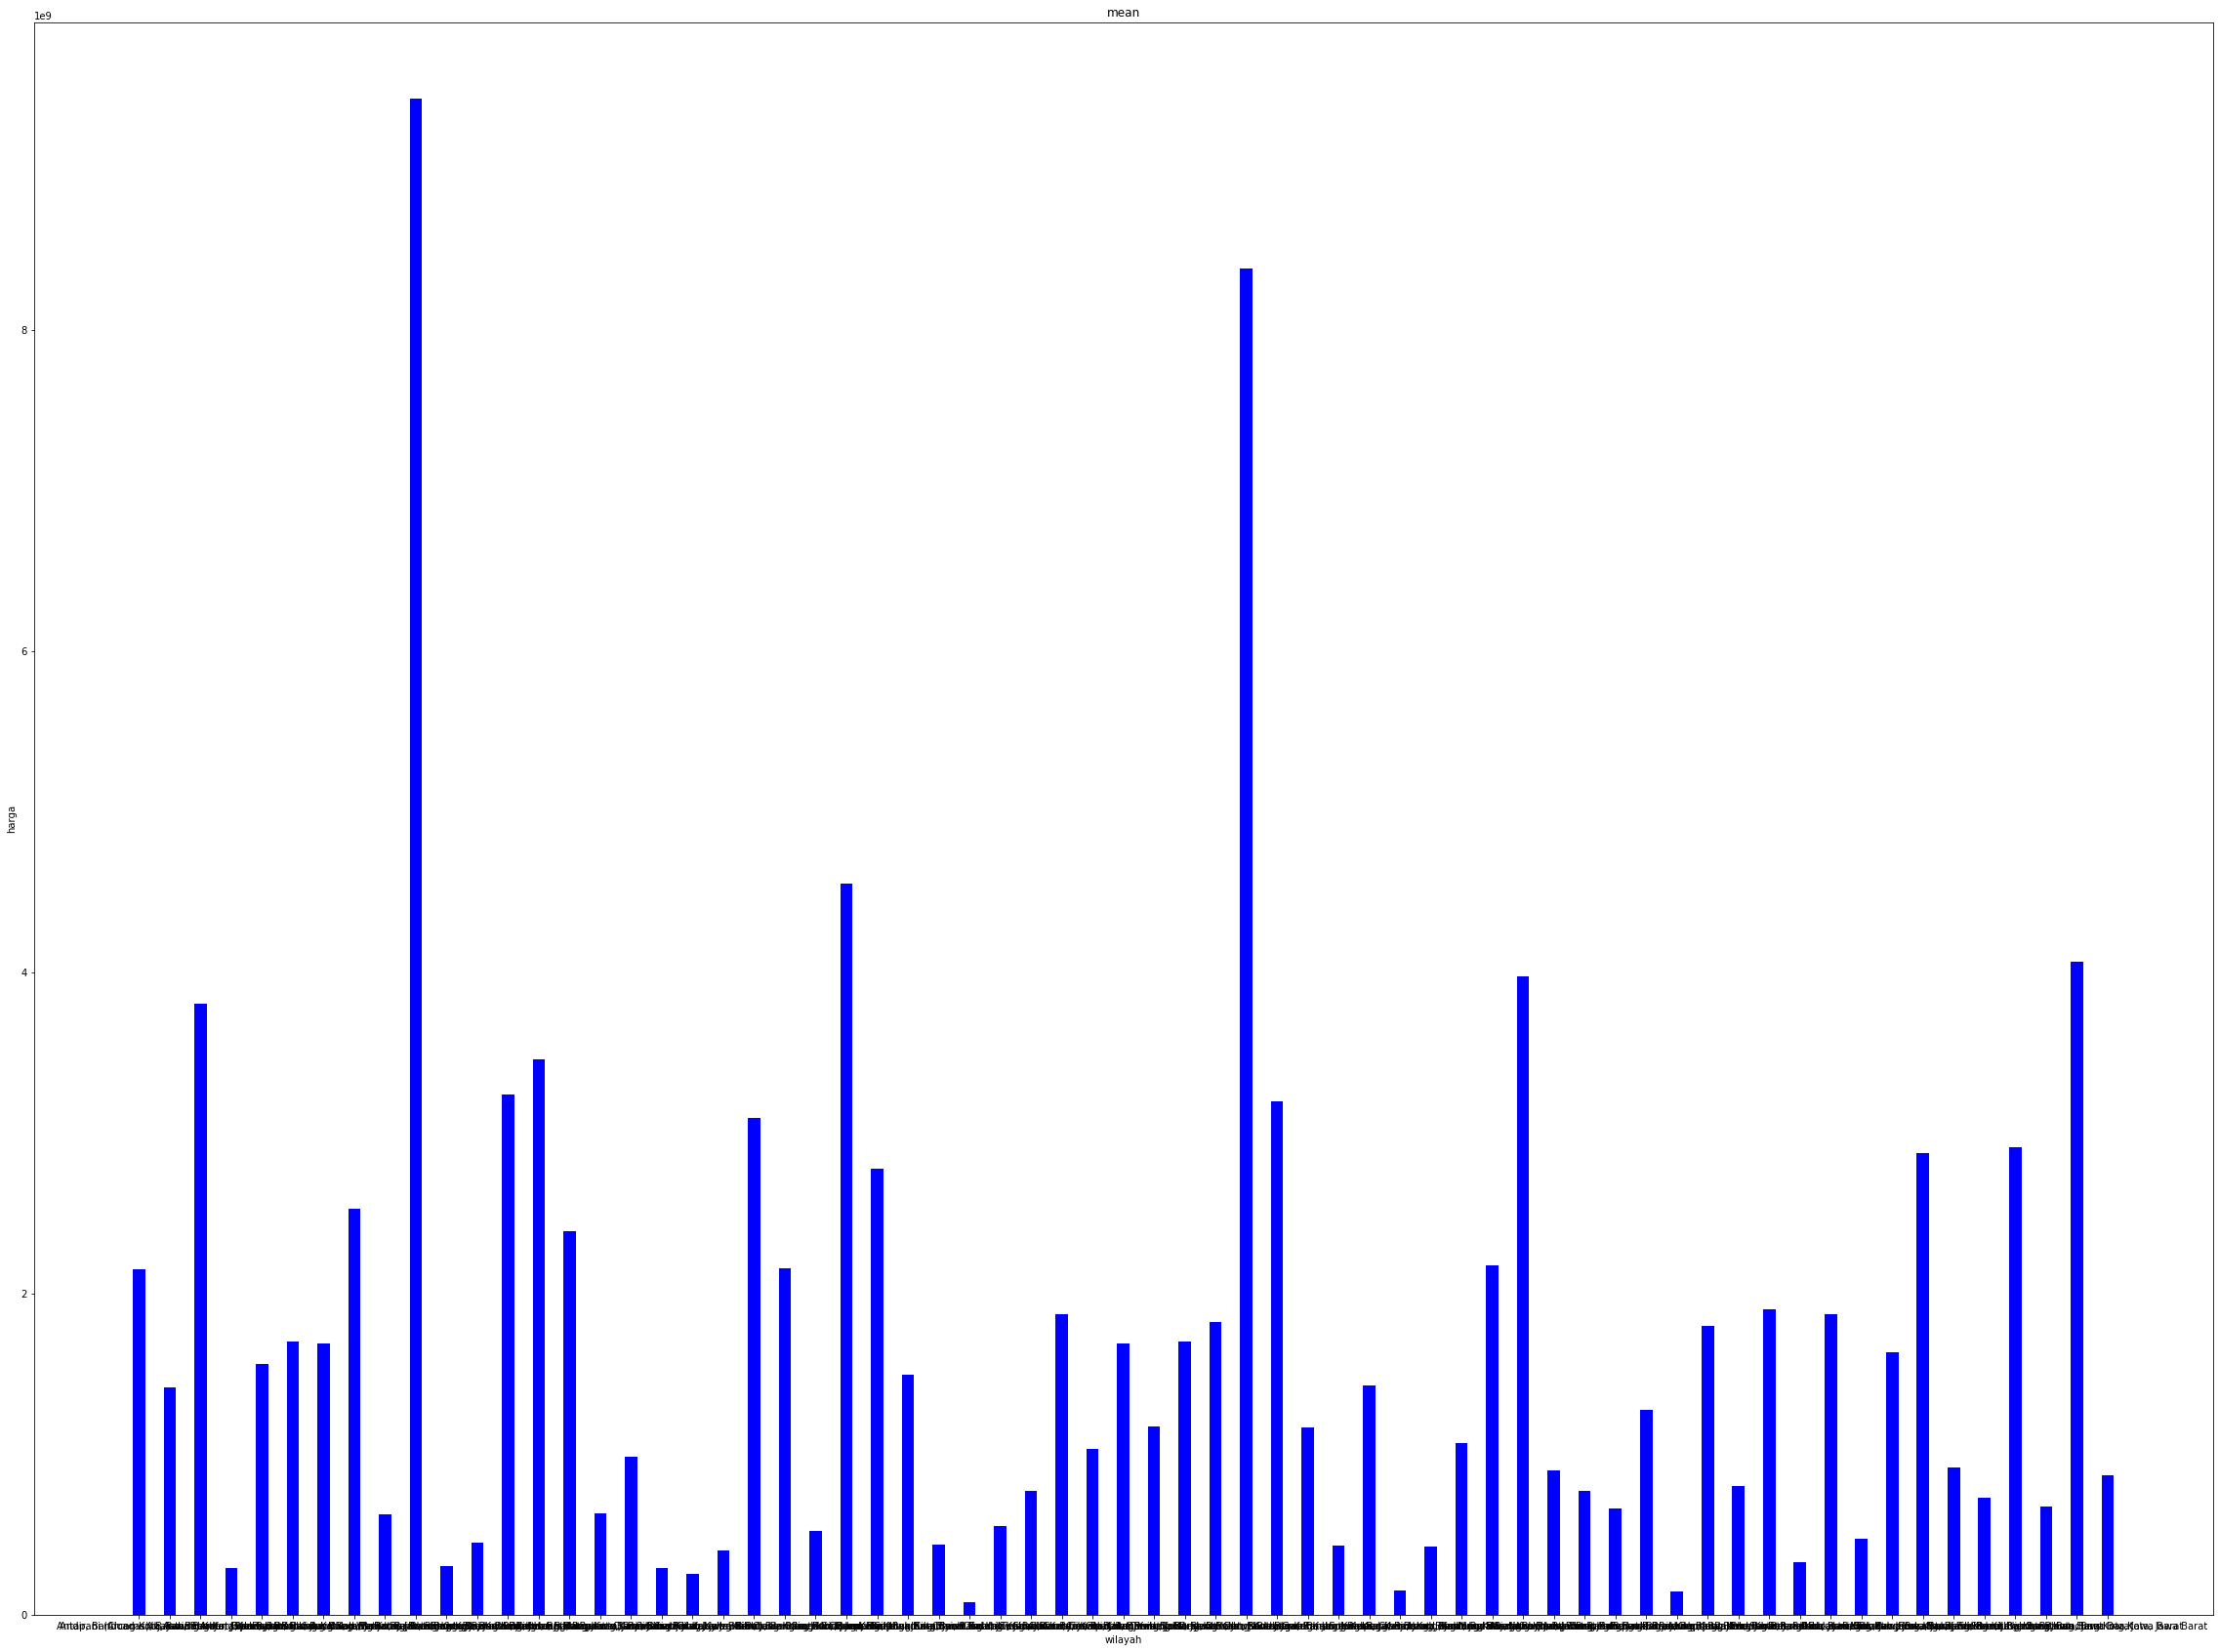

In [42]:
ig = plt.figure(figsize = (40, 30)) 
  
# creating the bar plot 

plt.bar(hargapwilayah.location, hargapwilayah.price, color ='blue',  
        width = 0.4) 
  
plt.xlabel("wilayah") 
plt.ylabel("harga") 
plt.title("mean") 
plt.show() 

In [43]:
hargapwilayah.sort_values(['price'], ascending=False).head(15)

,location,price
9,"Bandung Wetan, Bandung Kota, Jawa Barat",9443673078.706
36,"Coblong, Bandung Kota, Jawa Barat",8380837353.758
23,"Cicalengka, Bandung Kab., Jawa Barat",4551900000.000
63,"Sumur Bandung, Bandung Kota, Jawa Barat",4065923141.099
45,"Lengkong, Bandung Kota, Jawa Barat",3976851175.377
2,"Arcamanik, Bandung Kota, Jawa Barat",3804375000.000
13,"Bojongloa Kaler, Bandung Kota, Jawa Barat",3457789659.333
12,"Batununggal, Bandung Kota, Jawa Barat",3240504598.486
37,"Dayeuhkolot, Bandung Kab., Jawa Barat",3196944444.444
20,"Cibeunying Kaler, Bandung Kota, Jawa Barat",3092304245.819


In [44]:
hargapwilayah.sort_values(['price'], ascending=True).head(15)

,location,price
27,"Cilengkrang, Bandung Kab., Jawa Barat",80000000.000
50,"Pameungpeuk, Bandung Kab., Jawa Barat",145000000.000
41,"Karangtengah, Cianjur Kab., Jawa Barat",150000000.000
18,"Cianjur, Cianjur Kab., Jawa Barat",255000000.000
17,"Bungursari, Purwakarta Kab., Jawa Barat",290000000.000
3,"Arjasari, Bandung Kab., Jawa Barat",291975000.000
10,"Banjaran, Bandung Kab., Jawa Barat",299800000.000
54,"Paseh, Sumedang Kab., Jawa Barat",325000000.000
19,"Cibatu, Purwakarta Kab., Jawa Barat",400000000.000
42,"Katapang, Bandung Kab., Jawa Barat",424750000.000


dapat dilihat bahwa top 15 dan bottom 15 data diatas
top 15 cenderung merupakan pusat kota, dimana memiliki fasilitas publik yang lebih unggul, sehingga memiliki rata-rata harga yang cukup tinggi

In [45]:
hargawilayahmax = data.groupby('location')['price'].max().reset_index()

In [46]:
hargawilayahmax

,location,price
0,"Andir, Bandung Kota, Jawa Barat",17000000000.000
1,"Antapani (Cicadas), Bandung Kota, Jawa Barat",35000000000.000
2,"Arcamanik, Bandung Kota, Jawa Barat",19400000000.000
3,"Arjasari, Bandung Kab., Jawa Barat",291975000.000
4,"Astana Anyar, Bandung Kota, Jawa Barat",26000000000.000
...,...,...
60,"Soreang, Bandung Kab., Jawa Barat",1400000000.000
61,"Sukajadi, Bandung Kota, Jawa Barat",42000000000.000
62,"Sukasari, Bandung Kota, Jawa Barat",840000000.000
63,"Sumur Bandung, Bandung Kota, Jawa Barat",32500000000.000


In [47]:
hargawilayahmax.sort_values(['price'], ascending=False).head(15)

,location,price
9,"Bandung Wetan, Bandung Kota, Jawa Barat",75000000000.000
36,"Coblong, Bandung Kota, Jawa Barat",67325000000.000
7,"Bandung Kidul, Bandung Kota, Jawa Barat",60000000000.000
61,"Sukajadi, Bandung Kota, Jawa Barat",42000000000.000
12,"Batununggal, Bandung Kota, Jawa Barat",42000000000.000
13,"Bojongloa Kaler, Bandung Kota, Jawa Barat",37500000000.000
21,"Cibeunying Kidul, Bandung Kota, Jawa Barat",35000000000.000
1,"Antapani (Cicadas), Bandung Kota, Jawa Barat",35000000000.000
63,"Sumur Bandung, Bandung Kota, Jawa Barat",32500000000.000
4,"Astana Anyar, Bandung Kota, Jawa Barat",26000000000.000


In [48]:
hargawilayahmax.sort_values(['price'], ascending=True).head(15)

,location,price
27,"Cilengkrang, Bandung Kab., Jawa Barat",80000000.000
41,"Karangtengah, Cianjur Kab., Jawa Barat",150000000.000
50,"Pameungpeuk, Bandung Kab., Jawa Barat",170000000.000
17,"Bungursari, Purwakarta Kab., Jawa Barat",290000000.000
3,"Arjasari, Bandung Kab., Jawa Barat",291975000.000
10,"Banjaran, Bandung Kab., Jawa Barat",299800000.000
54,"Paseh, Sumedang Kab., Jawa Barat",325000000.000
18,"Cianjur, Cianjur Kab., Jawa Barat",365000000.000
19,"Cibatu, Purwakarta Kab., Jawa Barat",400000000.000
26,"Cihampelas, Bandung Barat Kab., Jawa Barat",435000000.000


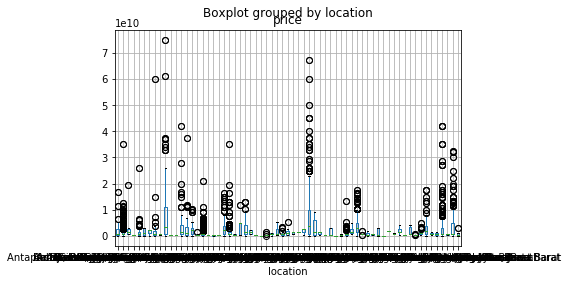

In [49]:
data.boxplot(column='price',by='location')

In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7107 entries, 279 to 7988
Data columns (total 9 columns):
bedroom        7107 non-null int32
bathroom       7107 non-null int32
landsqr        7107 non-null int64
buildingsqr    7107 non-null int64
cert           7107 non-null object
location       7107 non-null object
floor          7107 non-null float64
numOfFac       7107 non-null float64
price          7107 non-null float64
dtypes: float64(3), int32(2), int64(2), object(2)
memory usage: 499.7+ KB


### Corr

In [51]:
data.corr()

,bedroom,bathroom,landsqr,buildingsqr,floor,numOfFac,price
bedroom,1.000,0.819,0.523,0.677,0.323,0.152,0.468
bathroom,0.819,1.000,0.473,0.685,0.446,0.205,0.431
landsqr,0.523,0.473,1.000,0.705,0.077,0.189,0.698
buildingsqr,0.677,0.685,0.705,1.000,0.318,0.214,0.647
floor,0.323,0.446,0.077,0.318,1.000,0.160,0.081
numOfFac,0.152,0.205,0.189,0.214,0.160,1.000,0.183
price,0.468,0.431,0.698,0.647,0.081,0.183,1.000


# Feature Engineering

In [52]:
categorical = ['location','cert']

In [53]:
numerical = ['bedroom','bathroom','landsqr','buildingsqr','floor','numOfFac','price']

In [54]:
cats = pd.get_dummies(data[categorical],drop_first=True)


In [55]:
cats

,"location_Antapani (Cicadas), Bandung Kota, Jawa Barat","location_Arcamanik, Bandung Kota, Jawa Barat","location_Arjasari, Bandung Kab., Jawa Barat","location_Astana Anyar, Bandung Kota, Jawa Barat","location_Babakan Ciparay, Bandung Kota, Jawa Barat","location_Baleendah, Bandung Kab., Jawa Barat","location_Bandung Kidul, Bandung Kota, Jawa Barat","location_Bandung Kulon, Bandung Kota, Jawa Barat","location_Bandung Wetan, Bandung Kota, Jawa Barat","location_Banjaran, Bandung Kab., Jawa Barat","location_Batujajar, Bandung Barat Kab., Jawa Barat","location_Batununggal, Bandung Kota, Jawa Barat","location_Bojongloa Kaler, Bandung Kota, Jawa Barat","location_Bojongloa Kidul, Bandung Kota, Jawa Barat","location_Bojongsoang, Bandung Kab., Jawa Barat","location_Buahbatu (Margacinta), Bandung Kota, Jawa Barat","location_Bungursari, Purwakarta Kab., Jawa Barat","location_Cianjur, Cianjur Kab., Jawa Barat","location_Cibatu, Purwakarta Kab., Jawa Barat","location_Cibeunying Kaler, Bandung Kota, Jawa Barat","location_Cibeunying Kidul, Bandung Kota, Jawa Barat","location_Cibiru, Bandung Kota, Jawa Barat","location_Cicalengka, Bandung Kab., Jawa Barat","location_Cicendo, Bandung Kota, Jawa Barat","location_Cidadap, Bandung Kota, Jawa Barat","location_Cihampelas, Bandung Barat Kab., Jawa Barat","location_Cilengkrang, Bandung Kab., Jawa Barat","location_Cileunyi, Bandung Kab., Jawa Barat","location_Cimahi Selatan, Cimahi Kota, Jawa Barat","location_Cimahi Tengah, Cimahi Kota, Jawa Barat","location_Cimahi Utara, Cimahi Kota, Jawa Barat","location_Cimeunyan, Bandung Kab., Jawa Barat","location_Cinambo, Bandung Kota, Jawa Barat","location_Cipatat, Bandung Barat Kab., Jawa Barat","location_Ciwidey, Bandung Kab., Jawa Barat","location_Coblong, Bandung Kota, Jawa Barat","location_Dayeuhkolot, Bandung Kab., Jawa Barat","location_Garut Kota, Garut Kab., Jawa Barat","location_Gedebage, Bandung Kota, Jawa Barat","location_Jatinangor, Sumedang Kab., Jawa Barat","location_Karangtengah, Cianjur Kab., Jawa Barat","location_Katapang, Bandung Kab., Jawa Barat","location_Kiaracondong, Bandung Kota, Jawa Barat","location_Lembang, Bandung Barat Kab., Jawa Barat","location_Lengkong, Bandung Kota, Jawa Barat","location_Mandalajati, Bandung Kota, Jawa Barat","location_Margahayu, Bandung Kab., Jawa Barat","location_Ngamprah, Bandung Barat Kab., Jawa Barat","location_Padalarang, Bandung Barat Kab., Jawa Barat","location_Pameungpeuk, Bandung Kab., Jawa Barat","location_Pangalengan, Bandung Kab., Jawa Barat","location_Panyileukan, Bandung Kota, Jawa Barat","location_Parongpong, Bandung Barat Kab., Jawa Barat","location_Paseh, Sumedang Kab., Jawa Barat","location_Purwakarta, Purwakarta Kab., Jawa Barat","location_Rancaekek, Bandung Kab., Jawa Barat","location_Rancasari, Bandung Kota, Jawa Barat","location_Regol, Bandung Kota, Jawa Barat","location_Solokan Jeruk, Bandung Kab., Jawa Barat","location_Soreang, Bandung Kab., Jawa Barat","location_Sukajadi, Bandung Kota, Jawa Barat","location_Sukasari, Bandung Kota, Jawa Barat","location_Sumur Bandung, Bandung Kota, Jawa Barat","location_Ujung Berung, Bandung Kota, Jawa Barat","cert_Lainnya (PPJB, Girik, Adat, dll)",cert_SHM - Sertifikat Hak Milik
279,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
280,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
281,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
282,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
283,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [56]:
data.drop(categorical,axis=1,inplace=True)
data = pd.concat([data,cats],axis=1)


In [57]:
y_train=data[['price']]
X_train=data.drop(['price'],axis=1)

In [58]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
feature_sel_model = SelectFromModel(Lasso(alpha=0.005, random_state=0)) # remember to set the seed, the random state in this function
feature_sel_model.fit(X_train, y_train)

SelectFromModel(estimator=Lasso(alpha=0.005, copy_X=True, fit_intercept=True,
                                max_iter=1000, normalize=False, positive=False,
                                precompute=False, random_state=0,
                                selection='cyclic', tol=0.0001,
                                warm_start=False),
                max_features=None, norm_order=1, prefit=False, threshold=None)

In [59]:
feature_sel_model.get_support()


array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True])

In [60]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [61]:

from sklearn.model_selection import train_test_split

In [62]:
X=X_train
Y=y_train
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=123)

In [63]:
lm = linear_model.LinearRegression()
model = lm.fit(X_train, Y_train)
predictions = lm.predict(X_test)

In [64]:
predictions

array([[ 1.16472196e+09],
       [ 5.04851526e+08],
       [ 4.52906201e+09],
       ...,
       [ 5.78712707e+08],
       [-2.44395057e+08],
       [-1.26394783e+08]])

Text(0, 0.5, 'Predictions')

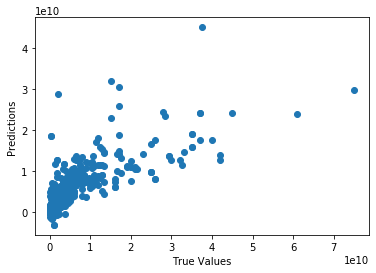

In [65]:
plt.scatter(Y_test, predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")

In [66]:
model.score(X_test, Y_test)

0.6107836933940308

In [83]:
import xgboost as xgb
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.5, learning_rate = 0.5,
                max_depth = 50, alpha = 10, n_estimators = 10)

In [84]:

model2 = xg_reg.fit(X_train, Y_train)
predictions2 = xg_reg.predict(X_test)

[15:49:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.0.0/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.


Text(0, 0.5, 'Predictions')

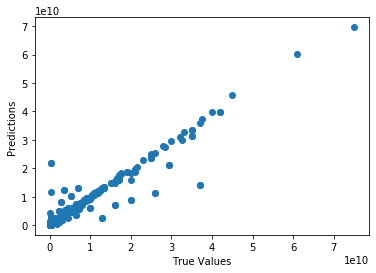

In [85]:
plt.scatter(Y_test, predictions2)
plt.xlabel("True Values")
plt.ylabel("Predictions")

In [86]:
model2.score(X_test, Y_test)

0.9194385887151287